# extract feature with Vgg19

---



## lmport librarys

In [ ]:
import io
import requests
import torch
import numpy as np
import PIL.Image as Image
import torch.nn.functional as F
import pandas as pd
import pydicom as dicom
import cv2
import glob
from PIL import Image
from torchvision import models , transforms
from torch.autograd import  Variable
from torch import nn
from os import listdir
from  os.path import isfile , join
import seaborn as sb
import sklearn
import time
import os
import gc
from sklearn import preprocessing
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import mutual_info_score, precision_score, recall_score, fbeta_score, confusion_matrix, accuracy_score
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import missingno as msno
from keras.utils import to_categorical
from sklearn.metrics import mutual_info_score
import random

## loading model vgg 19


In [ ]:
fileInfo1 = []

In [ ]:
vgg_model=models.vgg19(pretrained=True)
vgg_conv=nn.Sequential(*list(vgg_model.children()) [: -2])

## preprocess & normalized

In [ ]:
for param in vgg_model.parameters():
    param.require_grad = False
normalize=transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])

preprocess=transforms.Compose([transforms.Resize(224),#transforms.CenterCrop(32),
                               transforms.ToTensor(),normalize])


### initate file for data fram and read images

In [ ]:
#img_file=Image.open(img_folder + img_name1 + str(i)+ img_name2)
fNo1=53
for i in range (0,53) :
    img_file=Image.open('H:\AD\.'+ str(i)+ '.dcm')
    img_tensor = preprocess(img_file)
    img_tensor.unsqueeze_(0)
    inputs = Variable(img_tensor)
    outputs = vgg_conv(inputs)
    outputs1 = torch.Tensor.numpy(outputs.data)
    outputs2 = np.reshape(outputs1,(outputs1.shape[0],outputs1.shape[1]*outputs1.shape[2]*outputs1.shape[3]))
    output = F.adaptive_max_pool2d(inputs,(1,fNo1))
    outputss = np.asarray(output)
    outputss = np.reshape(outputss,(outputss.shape[1]*outputss.shape[2]*outputss.shape[3]),outputss.shape[0])
    fileInfo1.append(outputss)



In [ ]:
fNo1=400
for i in range (0,53) :
    img_file=Image.open('H:\AD\.'+ str(i)+ '.dcm')
    img_tensor = preprocess(img_file)
    img_tensor.unsqueeze_(0)
    inputs = Variable(img_tensor)
    outputs = vgg_conv(inputs)
    outputs1 = torch.Tensor.numpy(outputs.data)
    outputs2 = np.reshape(outputs1,(outputs1.shape[0],outputs1.shape[1]*outputs1.shape[2]*outputs1.shape[3]))
    output = F.adaptive_max_pool2d(inputs,(1,fNo1))
    outputss = np.asarray(output)
    outputss = np.reshape(outputss,(outputss.shape[1]*outputss.shape[2]*outputss.shape[3]),outputss.shape[0])
    fileInfo1.append(outputss)

In [ ]:
fileInfoFinal = pd.DataFrame(fileInfo1)
print(fileInfoFinal.shape)



(0, 0)


In [ ]:
fileInfoFinal.to_csv('H:\AD\.csv',index=False)

In [ ]:

filesInfo1 = pd.read_csv('H:\AD\.csv' )
print(filesInfo1.shape)
##number empty data fram
fNo1=400
##number for feature extraction
fno=2*400
#build  emoty data frame in csv file
i=0
FilesInfo2 = filesInfo1
FilesInfo2 .shape
for i in range (fno):
    FilesInfo2=pd.concat([FilesInfo2,pd.Series(np.arange(filesInfo1.shape[0]))], axis=1)
tmp2 = np.arange(FilesInfo2.shape[1])
tmp2.astype(str)
FilesInfo2.columns = tmp2
FilesInfo2.shape
FilesInfo2.astype(str)
##########loading image & build model
## broken name of the file
img_folder='H:\AD\'
img_name1='ADNI.'
img_name2='.dcm'


### extract feature

In [ ]:
for i in range (0,515) :
    img_file=Image.open(img_folder + img_name1 + str(i)+ img_name2)
    img_tensor = preprocess(img_file)
    img_tensor.unsqueeze_(0)
    inputs = Variable(img_tensor)
    outputs = vgg_conv(inputs)
    outputs1 = torch.Tensor.numpy(outputs.data)
    outputs2 = np.reshape(outputs1,(outputs1.shape[0],outputs1.shape[1]*outputs1.shape[2]*outputs1.shape[3]))
    output = F.adaptive_max_pool2d(inputs,(1,fNo1))
    outputss = np.asarray(output)
    outputss = np.reshape(outputss,(outputss.shape[1]*outputss.shape[2]*outputss.shape[3]),outputss.shape[0])
    fileInfo1.append(outputss)
    FilesInfo2.iloc[i-1,0:outputss.shape[0]]= outputss

### save out put in csv

In [ ]:
print(FilesInfo2.shape)
FilesInfo2.astype(str)
FilesInfo2.to_csv(img_folder+'')

# start modeling

In [ ]:
data1 = pd.read_csv("H:\AD\.csv")
data1


In [ ]:
from pandas import DataFrame
corrMatrix = data1.corr()
corrMatrix

In [ ]:
corrMatrix[1]

0        0.878848
1        1.000000
2        0.964511
3        0.846369
4        0.955008
5        0.927445
6        0.779133
7        0.891564
8        0.871440
9        0.746242
10       0.833467
11       0.825339
12       0.705987
13       0.780106
14       0.784100
15       0.691823
16       0.753058
17       0.758561
18       0.679776
19       0.743564
20       0.743264
21       0.658110
22       0.709975
23       0.707733
24       0.630616
25       0.680103
26       0.679036
27       0.624304
28       0.669994
29       0.674413
           ...   
1171     0.053662
1172     0.066372
1173     0.012143
1174     0.058659
1175     0.073617
1176     0.000155
1177     0.054265
1178     0.072871
1179    -0.013905
1180     0.038313
1181     0.057589
1182     0.002694
1183     0.061212
1184     0.074459
1185    -0.013574
1186     0.034367
1187     0.057481
1188     0.009546
1189     0.057436
1190     0.074982
1191    -0.006892
1192     0.034522
1193     0.063418
1194     0.004823
1195     0

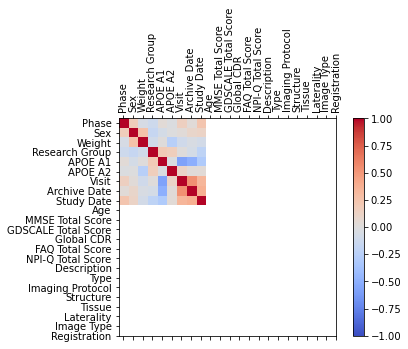

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('H:\my AD group payanname.csv', index_col=0)
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [ ]:

corrMatrix[corrMatrix[9]>=0.95]

In [ ]:
b = np.array(corrMatrix)
bb = corrMatrix.where(corrMatrix>0.95)

In [ ]:
data_a = pd.read_csv("H:\my AD group payanname.csv")
data_a
cols1 = data_a.columns
corrList = []
labels = data_a.iloc[:,1200]
a1 = np.corrcoef(data_a.iloc[:,0], labels)
print(a1[0,1])
for i in range(data_a.shape[1]):
    a1 = np.corrcoef(data_a.iloc[:,i], labels)
    corrList.append(a1[0,1])
a1 = range((1200))
lists = [a1,corrList]
df = pd.concat([pd.Series(x) for x in lists], axis=1)
df.iloc[:,1] = abs(df.iloc[:,1])
df2 = df[df.iloc[:,1]>0.18]
print(df2.shape)
df2.iloc[(df2.shape[0]-1),0] = 1200
allData3 = data_a.iloc[:,df2.iloc[:,0].astype(int)]
allData3.to_csv('H:\my AD group payanname.csv',index=False)

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
import numpy as np
h = 32
#model declaration
model = VGG19(weights='imagenet', include_top=False, input_shape=(h,h,3))
model.summary()

rightMaskFeatures1 = []
### it is required a for loop to read images and extract features per image
#the following code extracts features from one image
imgtmp = 'H:\AD' #read image from its file
imgtmp = cv2.resize(imgtmp,(h,h))
img_data = image.img_to_array(imgtmp)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)
vgg19_feature = model.predict(img_data)
vgg19_features = np.reshape(vgg19_feature,(vgg19_feature.shape[0]*vgg19_feature.shape[1]*vgg19_feature.shape[2]*vgg19_feature.shape[3]))
print(vgg19_features.shape)
rightMaskFeatures1.append(vgg19_features)


#after extracting features from all images and appending their features, run the following code
r = pd.DataFrame(rightMaskFeatures1)
print(r.shape)
r.head()